In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, Dense, Dropout
import tensorflow_hub as hub
from keras.models import Sequential

In [ ]:
from keras_preprocessing import image
import pathlib

In [ ]:
dir=pathlib.Path("/content/drive/MyDrive/DL/CNN/flower_photos")
list(dir.glob("*/*.jpg"))[:2]

[PosixPath('/content/drive/MyDrive/DL/CNN/flower_photos/sunflowers/164670455_29d8e02bbd_n.jpg'),
 PosixPath('/content/drive/MyDrive/DL/CNN/flower_photos/sunflowers/1596293240_2d5b53495a_m.jpg')]

In [ ]:
image_dict={"daisy": list(dir.glob("daisy/*.jpg")),
            "dandelion": list(dir.glob("dandelion/*.jpg")),
            "roses": list(dir.glob("roses/*.jpg")),
            "sunflowers": list(dir.glob("sunflowers/*.jpg")),
            "tulips": list(dir.glob("tulips/*.jpg"))
            }

label_dict={"daisy":0,
            "dandelion":1,
            "roses":2,
            "sunflowers":3,
            "tulips":4}

In [ ]:
import cv2, numpy as np

X,y = [], []

for flowername, flowerpath in image_dict.items():
  for path in flowerpath:
    im_tmp= cv2.resize(cv2.imread(str(path)),(224,224)) #resize
    im_tmp=im_tmp/255 #scale
    X.append(im_tmp)
    y.append(label_dict.get(flowername))

X=np.array(X)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480, 224, 224, 3), (120, 224, 224, 3), (480,), (120,))

In [ ]:
LAYERS = [hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/5",input_shape=(224,224,3)),
          Dense(units=120, activation='relu'),
          Dense(units=5, activation='sigmoid')]

In [ ]:
model=Sequential(LAYERS)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1792)              4363712   
                                                                 
 dense (Dense)               (None, 120)               215160    
                                                                 
 dense_1 (Dense)             (None, 5)                 605       
                                                                 
Total params: 4,579,477
Trainable params: 215,765
Non-trainable params: 4,363,712
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=1, batch_size=32,verbose=2)

15/15 - 24s - loss: 0.0968 - accuracy: 0.9771 - 24s/epoch - 2s/step


In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 9s 2s/step - loss: 0.3582 - accuracy: 0.8500


[0.35821762681007385, 0.8500000238418579]

In [ ]:
augmentation=Sequential(
    [
        tf.keras.layers.RandomFlip(mode="horizontal_and_vertical", input_shape=(224,224,3)),
        # tf.keras.layers.experimental.preprocessing.RandomCrop(),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.RandomContrast(0.2)
    ]
)

In [ ]:
model1=Sequential([
    augmentation,
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/5"),
    Dense(units=128, activation='relu'),
    Dense(units=5,activation='softmax')
])
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_16 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 keras_layer_11 (KerasLayer)  (None, 1792)             4363712   
                                                                 
 dense_18 (Dense)            (None, 128)               229504    
                                                                 
 dense_19 (Dense)            (None, 5)                 645       
                                                                 
Total params: 4,593,861
Trainable params: 230,149
Non-trainable params: 4,363,712
_________________________________________________________________


In [ ]:
tf.get_logger().setLevel('ERROR') #just suppressing the warning
model1.fit(X_train, y_train, epochs=2, batch_size=32, verbose=2)

Epoch 1/2
15/15 - 29s - loss: 0.7174 - accuracy: 0.7292 - 29s/epoch - 2s/step
Epoch 2/2
15/15 - 26s - loss: 0.3974 - accuracy: 0.8625 - 26s/epoch - 2s/step


In [ ]:
model1.evaluate(X_test, y_test)

4/4 [==============================] - 6s 1s/step - loss: 0.4670 - accuracy: 0.8167


[0.46697548031806946, 0.8166666626930237]

Single image augmentation

In [4]:
from keras_preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

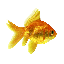

In [8]:
fish_oringial=image.load_img("/content/drive/MyDrive/DL/CNN/gold_fish.jpg", target_size=(64,64,3))
fish_oringial

In [30]:
fish_arr=image.img_to_array(fish_oringial)
fish_arr=fish_arr.reshape((1,)+fish_arr.shape)
image_generator=ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=0.2)
generator_obj=image_generator.flow(x=fish_arr, batch_size=1, save_to_dir="/content/drive/MyDrive/DL/CNN/Augmented_Fishes")

i=0
for x in generator_obj:
  i=i+1
  if i>=100:
    break

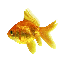

In [33]:
image.load_img("/content/drive/MyDrive/DL/CNN/Augmented_Fishes/_0_1048.png")